In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [6]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [7]:
df.head().T  #seeing all the headers easier in a single column

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

total charger is supposed to be a number but is given as a string

pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_"

ValueError: Unable to parse string "_" at position 488

we will get this error when we try to convert

In [9]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [10]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [11]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')  #force to convert to numbers

In [12]:
df.totalcharges = df.totalcharges.fillna(0)

In [13]:
df.iloc[488][['customerid', 'totalcharges']]

customerid      4472-lvygi
totalcharges           0.0
Name: 488, dtype: object

In [14]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

We don't need yes or no instead we need yes as 1 and no as 0

In [15]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [16]:
(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [17]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [18]:
df.churn = (df.churn == 'yes').astype(int)

### Setting Up the validation framework

In [19]:
!pip install scikit-learn

In [20]:
from sklearn.model_selection import train_test_split    #built in split for train test 

In [21]:
train_test_split(df, test_size=0.2, random_state=1)
#random_stte is to ensure that the results are reproducible
#this function splits into 2 parts train and test
# we will need to split test once again for val


[      customerid  gender  seniorcitizen partner dependents  tenure  \
 1814  5442-pptjy    male              0     yes        yes      12   
 5946  6261-rcvns  female              0      no         no      42   
 3881  2176-osjuv    male              0     yes         no      71   
 2389  6161-erdgd    male              0     yes        yes      71   
 3676  2364-ufrom    male              0      no         no      30   
 ...          ...     ...            ...     ...        ...     ...   
 905   0781-lkxbr    male              1      no         no       9   
 5192  3507-gasnp    male              0      no        yes      60   
 3980  8868-wozgu    male              0      no         no      28   
 235   1251-krreg    male              0      no         no       2   
 5157  5840-nvdcg  female              0     yes        yes      16   
 
      phoneservice multiplelines internetservice       onlinesecurity  ...  \
 1814          yes            no              no  no_internet_servic

In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(5634, 1409)

In [23]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val)

#0.25 cos we need the 20% of the 80% so that is 0.25

(4225, 1409)

In [24]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [25]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

In [26]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [27]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [28]:
del df_train['churn']
del df_test['churn']
del df_val['churn']

### EDA

For eda, we use full data

In [29]:
df_full_train 

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [30]:
df_full_train = df_full_train .reset_index(drop = True)

In [31]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [32]:
df_full_train.churn.value_counts()    #checking how many 1s and 0s are there

churn
0    4113
1    1521
Name: count, dtype: int64

In [33]:
df_full_train.churn.value_counts(normalize = True)     #to get churn rate, i.e in percentage

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [34]:
#Also finding the mean will give us churn rate
#bcos all ones added by total number of elements end up beiung the churn rate
df_full_train.churn.mean()

np.float64(0.26996805111821087)

In [35]:
#now look at categorical and numerical variables
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [36]:
#senior citizen is not really a number, its a categorical variable
#there are actually 3 numerical variables

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [37]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [38]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [39]:
df_full_train[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
1,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic)
2,male,0,yes,no,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic)
3,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check
4,male,0,no,no,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,male,1,no,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check
5630,male,0,no,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
5631,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check
5632,male,0,no,no,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check


In [40]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature Importance

In [41]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [42]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [43]:
churn_global = df_full_train.churn.mean()
churn_global

np.float64(0.26996805111821087)

In [44]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [45]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [46]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

we see that churn rate doesn't depend on gender is mostly same for male and female

But partner variable seems to be more important feature

difference and the risk ratio as two important tools for assessing feature importance.

Concerning the difference, we calculate it by subtracting the group’s churn rate from the global churn rate. Here, we are primarily interested in significant differences, unlike in the gender case. Values for this difference smaller than 0 indicate a higher likelihood to churn, while values larger than 0 indicate a lower likelihood to churn.

As for the risk ratio, it is obtained by dividing the group’s churn rate by the global churn rate. Values greater than 1 suggest a higher likelihood to churn, whereas values less than 1 suggest a lower likelihood to churn.



In [47]:
churn_no_partner/churn_global

np.float64(1.2216593879412643)

In [48]:
churn_partner/churn_global

np.float64(0.7594724924338315)

In [49]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [50]:
df_full_train.groupby('gender').churn.agg(['mean', 'count'])    #to get dataframe iuse agg


,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [51]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - churn_global
df_group['risk'] = df_group['mean'] / churn_global
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [52]:
#doing this for each row 

for c in categorical:
    df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - churn_global
    df_group['risk'] = df_group['mean'] / churn_global
    df_group


In [53]:
#since the df_group is in a loop, it isnot displayed so

from IPython.display import display

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - churn_global
    df_group['risk'] = df_group['mean'] / churn_global
    display(df_group)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### Mutual information

a way to measure importance of categorical variables

Tells us how much we can learn about one variable if we know th evaliue of another

https://knowmledge.com/2023/09/28/ml-zoomcamp-2023-machine-learning-for-classification-part-6/

In [54]:
from sklearn.metrics import mutual_info_score

In [55]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

np.float64(0.0983203874041556)

In [56]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

np.float64(0.0001174846211139946)

this shows that the information we get from the typr of contract is much more imprtant than the info we get from learning about the gender

In [57]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [58]:
df_full_train[categorical].apply(mutual_info_churn_score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

When you use .apply(mutual_info_churn_score), Pandas automatically passes each column (which is a Series object in Pandas) to the series parameter of mutual_info_churn_score.
Under the Hood:

Let's say df_full_train[categorical] has three columns: contract_type, payment_method, and tenure.
When you run apply(mutual_info_churn_score), it behaves like this:

mutual_info_churn_score(df_full_train['contract_type'])  # First column passed
mutual_info_churn_score(df_full_train['payment_method'])  # Second column passed
mutual_info_churn_score(df_full_train['tenure'])          # Third column passed
You don't need to manually pass series because .apply() handles the iteration over each column for you and passes each column's data as series into the function.
Summary:
The series parameter in mutual_info_churn_score is implicitly passed by the .apply() method.
apply handles the process of passing each column (or row) into your function, so you don't have to pass it manually. Pandas does this automatically.



In [59]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [60]:
mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Feature Importance : Correlation

The correlation coefficient (often denoted as “r”) has a range of -1 to 1:

A negative correlation (r = -1) indicates a strong inverse relationship, where one variable increases as the other decreases.
A positive correlation (r = 1) indicates a strong positive relationship, where both variables increase together.
An r value close to 0 suggests a weak or no linear relationship between the variables.

In [61]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [62]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [63]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

### One hot encoding

using scikit learn to encode categorical features

In [64]:
from sklearn.feature_extraction import DictVectorizer

In [65]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [66]:
df_train[['gender', 'contract']].iloc[:10].to_dict()

{'gender': {0: 'female',
  1: 'male',
  2: 'female',
  3: 'female',
  4: 'female',
  5: 'male',
  6: 'male',
  7: 'female',
  8: 'female',
  9: 'female'},
 'contract': {0: 'two_year',
  1: 'month-to-month',
  2: 'month-to-month',
  3: 'month-to-month',
  4: 'two_year',
  5: 'month-to-month',
  6: 'month-to-month',
  7: 'month-to-month',
  8: 'two_year',
  9: 'month-to-month'}}

In [67]:
#we want  it done row wise
df_train[['gender', 'contract']].iloc[:10].to_dict(orient = 'records')

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'}]

In [68]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)

When using the transform method as shown in the last snippet, it creates a sparse matrix by default. A sparse matrix is a memory-efficient way of encoding data when there are many zeros in the dataset. But we’ll not use sparse matrix here.

thats why sparse = false

First, we need to create a new instance of this class. Then, we train our DictVectorizer instance. This involves presenting the data to the DictVectorizer so that it can infer the column names and their corresponding values. Based on this information, it creates the one-hot encoding feature matrix. It’s worth noting that the DictVectorizer is intelligent enough to detect numerical variables and exclude them from one-hot encoding, as they don’t require such encoding.

In [69]:
dv.fit(dicts)


DictVectorizer(sparse=False)

In [70]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [71]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In the code of the next snippet, the DictVectorizer returns a regular NumPy array where the first three columns represent the “contract” variable, and the last two columns represent the “gender” variable.

In [72]:
df_train[categorical + numerical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,tenure,monthlycharges,totalcharges
0,female,0,yes,yes,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,72,115.50,8425.15
1,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,10,95.25,1021.55
2,female,0,no,no,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,5,75.55,413.65
3,female,0,yes,yes,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,5,80.85,356.10
4,female,0,yes,no,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,18,20.10,370.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,male,1,yes,yes,yes,yes,dsl,no,yes,yes,no,yes,yes,one_year,yes,electronic_check,52,80.85,4079.55
4221,male,0,no,no,no,no_phone_service,dsl,no,no,no,no,no,no,month-to-month,no,mailed_check,18,25.15,476.80
4222,male,0,yes,yes,yes,no,fiber_optic,no,no,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),2,90.00,190.05
4223,female,0,yes,yes,yes,yes,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,27,24.50,761.95


In [73]:
train_dicts =  df_train[categorical + numerical].to_dict(orient = 'records')

In [74]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [75]:
dv = DictVectorizer(sparse = False)

In [76]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [77]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [78]:
list(dv.transform(train_dicts[:5])[0].round(2))

[np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(115.5),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(72.0),
 np.float64(8425.15)]

In [79]:
#what we can do is merge things

train_dicts =  df_train[categorical + numerical].to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)
X_train.shape

(4225, 45)

In [80]:
val_dicts =  df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.fit_transform(val_dicts)
X_val.shape


#basically what we do is
#we take our variables both categorical and numerical and put them into dictionary
#then we fit a dictionary vectorizer to teach the vectorizer what kind of values are there
#we get the dictionaries and transform them into a feature matrix that we use for training
#and do the same for val dataset

(1409, 45)

### Logistic regression

https://knowmledge.com/2023/09/30/ml-zoomcamp-2023-machine-learning-for-classification-part-9/

In [81]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [82]:
z = np.linspace(-5,5,51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [83]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

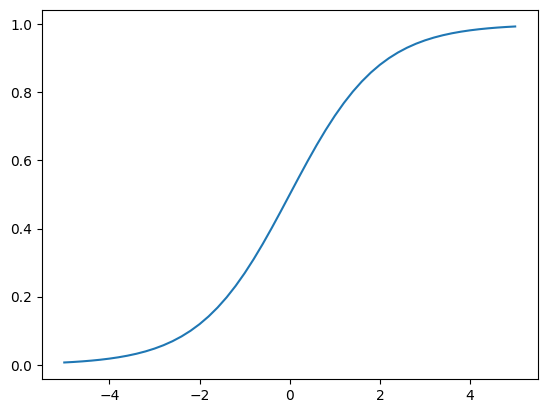

In [84]:
plt.plot(z,sigmoid(z))

In [85]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [86]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

Both linear and logistic regressions are fast models, fast to use and fast to train

they are called linear because they use dot products, ie, linear mx+y

### Training logistic regression with scikit learn

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
model = LogisticRegression()

In [89]:
model.fit(X_train, y_train)

c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
model.coef_[0].round(3)   #getting the w

array([ 0.479, -0.176, -0.411, -0.028, -0.079,  0.063, -0.087, -0.082,
       -0.034, -0.073, -0.338,  0.318, -0.087,  0.004, -0.258,  0.142,
        0.009,  0.062, -0.087, -0.082,  0.267, -0.087, -0.286, -0.231,
        0.124, -0.165,  0.058, -0.088, -0.032,  0.071, -0.058,  0.142,
       -0.249,  0.217, -0.121, -0.087,  0.102, -0.072, -0.087,  0.052,
        0.214, -0.087, -0.234, -0.07 ,  0.   ])

In [91]:
model.intercept_[0]   #w0

np.float64(-0.10831367663366755)

In [92]:
model.predict(X_train)     #hard prediction i.e, directly 0 or 1. we don't know the probability

array([0, 1, 1, ..., 1, 0, 1])

In [93]:
model.predict_proba(X_train)

array([[0.90655992, 0.09344008],
       [0.319531  , 0.680469  ],
       [0.36491917, 0.63508083],
       ...,
       [0.46847186, 0.53152814],
       [0.95668445, 0.04331555],
       [0.29919839, 0.70080161]])

there are 2 columns, first column is probability of negative class and the second column is the probability of positive class

In [94]:
y_pred = model.predict_proba(X_train)[:,1]  #we only need probability of churning ie, 1
y_pred

array([0.09344008, 0.680469  , 0.63508083, ..., 0.53152814, 0.04331555,
       0.70080161])

In [95]:
y_pred >= 0.5

array([False,  True,  True, ...,  True, False,  True])

In [96]:
churn_decision = (y_pred >= 0.5)


#doing same for val
y_pred = model.predict_proba(X_val)[:,1]  #we only need probability of churning ie, 1
churn_decision = (y_pred >= 0.5)
df_val[churn_decision]
df_val[churn_decision].customerid  #these people get promotional emails

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 314, dtype: object

In [97]:
#checking how accurate our predictions are
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [98]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [99]:
(y_val == churn_decision.astype(int)).mean()

np.float64(0.8026969481902059)

In [100]:
#whats happening inside
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred


,probability,prediction,actual,correct
0,0.008972,0,0,True
1,0.207583,0,0,True
2,0.215754,0,0,True
3,0.544267,1,1,True
4,0.217020,0,0,True
...,...,...,...,...
1404,0.316464,0,0,True
1405,0.039406,0,1,False
1406,0.136805,0,0,True
1407,0.800680,1,1,True


In [101]:
#find fraction of correct ones
df_pred.correct.mean()

np.float64(0.8026969481902059)

### Model Interpretation

In [102]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [103]:
model.coef_[0].round(3)

array([ 0.479, -0.176, -0.411, -0.028, -0.079,  0.063, -0.087, -0.082,
       -0.034, -0.073, -0.338,  0.318, -0.087,  0.004, -0.258,  0.142,
        0.009,  0.062, -0.087, -0.082,  0.267, -0.087, -0.286, -0.231,
        0.124, -0.165,  0.058, -0.088, -0.032,  0.071, -0.058,  0.142,
       -0.249,  0.217, -0.121, -0.087,  0.102, -0.072, -0.087,  0.052,
        0.214, -0.087, -0.234, -0.07 ,  0.   ])

In [104]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.479),
 'contract=one_year': np.float64(-0.176),
 'contract=two_year': np.float64(-0.411),
 'dependents=no': np.float64(-0.028),
 'dependents=yes': np.float64(-0.079),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.087),
 'deviceprotection=yes': np.float64(-0.082),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.338),
 'internetservice=fiber_optic': np.float64(0.318),
 'internetservice=no': np.float64(-0.087),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.142),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.062),
 'onlinebackup=no_internet_service': np.float64(-0.087),
 'onlinebackup=yes': np.float64(-0.082),
 'onlinesecurity=no': np.float64(0.267),
 'onlinesecurity=no_internet_service': np.float64(-0.087),
 'onlinesecurity=yes

In [105]:
#trying on a smaller dataset
small = ['contract', 'tenure', 'monthlycharges']

In [106]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [107]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [108]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [109]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [114]:
X_train_small = dv_small.transform(dicts_train_small)
X_train_small

array([[  0.  ,   0.  ,   1.  , 115.5 ,  72.  ],
       [  1.  ,   0.  ,   0.  ,  95.25,  10.  ],
       [  1.  ,   0.  ,   0.  ,  75.55,   5.  ],
       ...,
       [  1.  ,   0.  ,   0.  ,  90.  ,   2.  ],
       [  0.  ,   0.  ,   1.  ,  24.5 ,  27.  ],
       [  1.  ,   0.  ,   0.  ,  80.85,   9.  ]])

In [111]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [112]:
dict(zip(dv_small.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.479),
 'contract=one_year': np.float64(-0.176),
 'contract=two_year': np.float64(-0.411),
 'monthlycharges': np.float64(-0.028),
 'tenure': np.float64(-0.079)}

In [113]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.4779575953822954)

https://www.youtube.com/watch?v=OUrlxnUAAEA&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=38

Negative weights imply that, people with that kind of field, churn less

### Using the model

In [117]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [118]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_full_train)

In [120]:
y_full_train = df_full_train.churn.values

In [ ]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
#repeating same for test dataset

dicts_test = df_test[categorical + numerical].to_dict(orient = 'records')
X_test = dv.transform(dicts_test)
y_pred = model.predict_proba(X_test)[:, 1]
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()

np.float64(0.8133427963094393)